# Linear Models

In [2]:
import statsmodels.api as S
import pandas
import numpy as N
import tqdm
import matplotlib.pyplot as pyplot
import seaborn
from pathlib import Path

seaborn.set_style('whitegrid')

In [3]:
dfAll = pandas.read_csv(r'C:\Users\Administrator\Desktop\data_mean.csv')
dfAll

,BOROUGH,year,category,Crimes_1,Crimes_2,Crimes_3,Crimes_4,real price
0,Bronx,2009,1 Family Dwelling,0,0,0,0,431949.523204
1,Bronx,2009,1 Family Dwelling,1,1,2,0,36400.000000
2,Bronx,2009,1 Family Dwelling,4,2,13,0,152629.111629
3,Bronx,2009,1 Family Dwelling,4,3,4,0,154295.212480
4,Bronx,2009,1 Family Dwelling,4,7,11,0,122971.028971
...,...,...,...,...,...,...,...,...
3435,Staten Island,2015,Condo Apartment,8,14,9,8,217712.983330
3436,Staten Island,2015,Condo Apartment,10,16,10,13,83122.362869
3437,Staten Island,2015,Coop Apartment,4,3,5,0,76132.208158
3438,Staten Island,2015,Coop Apartment,8,14,9,8,85589.476297


# One-Hot encode data and add constant

In [4]:
dfOneHotBorough = pandas.get_dummies(dfAll['BOROUGH'])
dfOneHotCategory = pandas.get_dummies(dfAll['category'])
df = dfAll.drop('BOROUGH', axis=1).join(dfOneHotBorough).drop('category', axis=1).join(dfOneHotCategory)
df['year'] = df['year'] - 2000
dfTrain = df[df['year'] <= 13]#.drop('year',axis=1)
dfTest = df[df['year'] > 13]#.drop('year',axis=1)
df

,year,Crimes_1,Crimes_2,Crimes_3,Crimes_4,real price,Bronx,Brooklyn,Manhattan,Queens,Staten Island,1 Family Dwelling,2 Family Dwelling,Condo Apartment,Coop Apartment
0,9,0,0,0,0,431949.523204,1,0,0,0,0,1,0,0,0
1,9,1,1,2,0,36400.000000,1,0,0,0,0,1,0,0,0
2,9,4,2,13,0,152629.111629,1,0,0,0,0,1,0,0,0
3,9,4,3,4,0,154295.212480,1,0,0,0,0,1,0,0,0
4,9,4,7,11,0,122971.028971,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,15,8,14,9,8,217712.983330,0,0,0,0,1,0,0,1,0
3436,15,10,16,10,13,83122.362869,0,0,0,0,1,0,0,1,0
3437,15,4,3,5,0,76132.208158,0,0,0,0,1,0,0,0,1
3438,15,8,14,9,8,85589.476297,0,0,0,0,1,0,0,0,1


## Train Linear Model

In [5]:
dfTrain1 = S.add_constant(dfTrain)
dfX = dfTrain1.loc[:, dfTrain1.columns != 'real price']
dfY = dfTrain1[['real price']]
model = S.OLS(dfY, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             real price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     90.39
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          5.57e-185
Time:                        06:08:28   Log-Likelihood:                -36280.
No. Observations:                2468   AIC:                         7.259e+04
Df Residuals:                    2455   BIC:                         7.266e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.344e+05   6.92e+0

In [25]:
a=df.columns.drop(['real price']).insert(0,'constant')
b=[2.75,3.52,-0.56,-1.03,-1.89,-2.33,-5.86,0.23,33.76,-10.64,-7.97,12.99,8.64,-5.54,-8.79]
c=[1.32,1.99,-934.72,-1781.22,-3005.01,-2765.04,-1.60,5342.48,8.02,-2.26,-2.90,2.76,1.84,-1.27,-2.01]
p=[0.006,0,0.574,0.301,0.059,0.02,0,0.815,0,0,0,0,0,0,0]
dd=pandas.DataFrame([a,c,b,p],['variable','coef','t','p'])
dd=dd.transpose()
dd.to_excel(r'C:\Users\Administrator\Desktop\formula.xlsx')

In [33]:
cc=[str(i) for i in c]
formula='+'.join(cc+a)
formula

'1.32constant+1.99year+-934.72Crimes_1+-1781.22Crimes_2+-3005.01Crimes_3+-2765.04Crimes_4+-1.6Bronx+5342.48Brooklyn+8.02Manhattan+-2.26Queens+-2.9Staten Island+2.761 Family Dwelling+1.842 Family Dwelling+-1.27Condo Apartment+-2.01Coop Apartment'

In [6]:
testX1=S.add_constant(dfTest)
testX = testX1.loc[:, testX1.columns != 'real price']
testY=N.array(testX1[['real price']])
pre=N.array(result.predict(testX).reset_index().drop(['index'],axis=1))
mse=((testY-pre)**2).sum()/len(testY)
rmse=mse**0.5
mse,rmse

(470174321742.9083, 685692.5854513146)

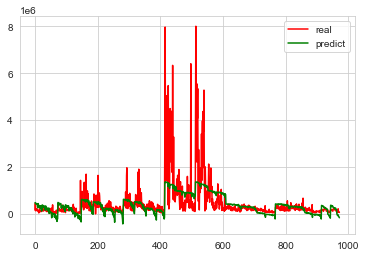

In [8]:
import matplotlib.pyplot as plt
plt.plot(testY,color='r',label='real')
plt.plot(pre,color='g',label='predict')
plt.legend(loc='upper right')
plt.show()